<a href="https://colab.research.google.com/github/kerenkschneider/VIsualization/blob/main/visulaiztion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 2.5MB 27.0MB/s 
     |████████████████████████████████| 1.2MB 40.6MB/s 
     |████████████████████████████████| 3.3MB 38.7MB/s 
     |████████████████████████████████| 901kB 37.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=0c9118252d6f690dd0182db51c893893fda59e4d54cb084b3dbddac452ae28b3
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers


In [ ]:
import re
import pandas as pd
import numpy as np

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('bert-base-nli-mean-tokens')

KeyboardInterrupt: ignored

In [ ]:
# title data
title = pd.read_csv("/content/title.csv").to_numpy().reshape((2999, ))

In [ ]:
sentence_embeddings = model.encode(titles)


In [ ]:
array = cosine_similarity(sentence_embeddings)

In [ ]:
pd.DataFrame(array).to_csv("title_out.csv", index=False)


In [ ]:
# desc data
desc = pd.read_csv("/content/desc.csv").to_numpy().reshape((2999, ))
sentence_embeddings = model.encode(desc)
array = cosine_similarity(sentence_embeddings)
pd.DataFrame(array).to_csv("desc_out.csv", index=False)


In [ ]:
# brand data
desc = pd.read_csv("/content/brand.csv").to_numpy().reshape((2999, ))
sentence_embeddings = model.encode(desc)

In [ ]:
  # brand data
brand = pd.read_csv("/content/brand.csv").to_numpy().reshape((2999, ))
sentence_embeddings1 = model.encode(brand)

In [ ]:
np.shape(sentence_embeddings1)

(2999, 768)

In [ ]:
pd.DataFrame(sentence_embeddings1).to_csv("brand_out.csv", index=False)

In [ ]:
  # color data
color = pd.read_csv("/content/color.csv").to_numpy().reshape((2999, ))
sentence_embeddings2 = model.encode(color)


In [ ]:
pd.DataFrame(sentence_embeddings2).to_csv("color_out.csv", index=False)

In [ ]:
np.shape(sentence_embeddings2)

(2999, 768)

--------------PCA--------------

In [ ]:
# get all the data to numpy array 
brand = pd.read_csv("/content/brand_out.csv").to_numpy()
color = pd.read_csv("/content/color_out.csv").to_numpy()
desc = pd.read_csv("/content/desc_out.csv").to_numpy()
title = pd.read_csv("/content/title_out.csv").to_numpy()
price = pd.read_csv("/content/price_norm_out.csv").to_numpy()

In [ ]:
np.shape(brand)

(1000, 768)

In [ ]:
data = np.concatenate((brand, color, desc, title, price),axis=1)

In [ ]:
data = data.astype(np.float64)

In [ ]:
data

array([[-0.16689679,  0.14071842,  1.0714529 , ...,  0.6337915 ,
         0.38373065,  0.09184302],
       [ 0.10283969, -0.95612806,  2.097986  , ...,  0.41672993,
         0.43882847,  0.11649887],
       [ 0.10283969, -0.95612806,  2.097986  , ...,  0.6221701 ,
         0.33579475,  0.11649887],
       ...,
       [ 0.0145203 , -0.41005564,  0.12616734, ...,  1.0000002 ,
         0.52015954,  0.11074584],
       [-0.04263783,  0.12288723,  1.4268028 , ...,  0.52015954,
         1.0000001 ,  0.13704541],
       [-0.17181098,  0.20038414,  1.902374  , ...,  0.8045734 ,
         0.53332126,  0.09102116]])

In [ ]:
pip install pca

In [ ]:
pip install numpy matplotlib sklearn

In [ ]:
# PCA

from pca import pca

In [ ]:
# Initialize to reduce the data up to the nubmer of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
model = pca(n_components=3)


In [ ]:
# Fit transform
results = model.fit_transform(data)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [3537] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
results['PC']

,PC1,PC2
1.0,-5.637214,0.189479
1.0,5.310874,3.299673
1.0,-5.322987,3.555683
1.0,-4.703995,8.825530
1.0,2.701776,-3.316989
...,...,...
1.0,-3.599107,0.923128
1.0,-7.239023,-0.136024
1.0,-7.458924,6.612948
1.0,8.155966,2.825242


In [ ]:
pd.DataFrame(results['PC']).to_csv("result.csv", index=False)

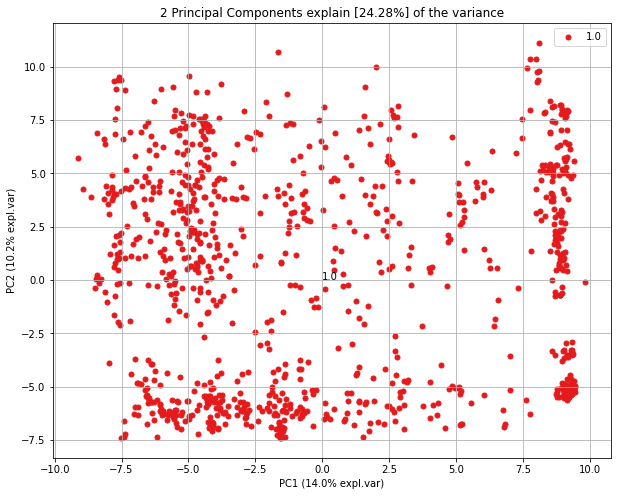

In [ ]:
fig, ax = model.scatter()

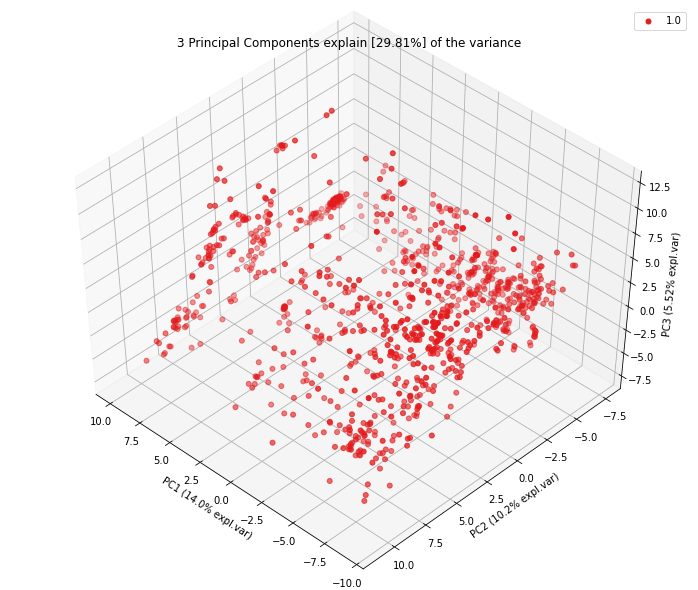

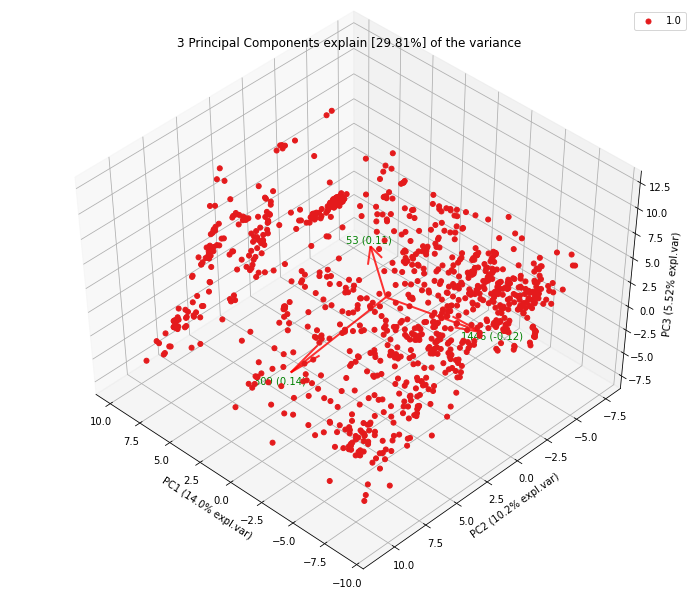

In [ ]:
fig, ax = model.scatter3d()
fig, ax = model.biplot3d(n_feat=2)